In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot

from tensorflow.keras.utils import to_categorical
import tensorflow.keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten, Reshape, GRU, Conv1D, MaxPooling1D, Bidirectional, ConvLSTM1D
from tensorflow.keras.layers import Input, TimeDistributed, Conv1D, MaxPooling1D, BatchNormalization, GlobalAveragePooling1D, Activation
from tensorflow.python.keras.utils import np_utils
from sklearn.metrics import precision_score, recall_score, f1_score

from typing import Any, Dict, List, Tuple
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns


def load_file(filepath):
    dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values



# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    # stack group so that features are the 3rd dimension
    loaded = np.dstack(loaded)
    return loaded

# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    # load all 9 files as a single array
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    # body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    # body gyroscope
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    # load input data
    X = load_group(filenames, filepath)
    # load class output
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y


# load the dataset, returns train and test X and y elements
# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
    # load all train
    trainX, trainy = load_dataset_group('train', prefix + "C:/Users/user/Downloads/UCI HAR Dataset/")
    # load all test
    testX, testy = load_dataset_group('test', prefix + "C:/Users/user/Downloads/UCI HAR Dataset/")

    #zero-offset class values
    trainy = trainy - 1
    testy = testy - 1

    trainy_one_hot = to_categorical(trainy)
    testy_one_hot = to_categorical(testy)
    print(trainX.shape, trainy.shape, trainy_one_hot.shape, testX.shape, testy.shape, testy_one_hot.shape)
    return trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot


In [3]:
trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot = load_dataset()

(7352, 128, 9) (7352, 1) (7352, 6) (2947, 128, 9) (2947, 1) (2947, 6)


In [4]:
print("X train shape: ", trainX.shape)
print("Y train shape: ", trainy.shape)
print("Y train One hot shape: ", trainy_one_hot.shape)
print("X test shape: ", testX.shape)
print("Y test shape: ", testy.shape)
print("Y test One hot shape: ", testy_one_hot.shape)

X train shape:  (7352, 128, 9)
Y train shape:  (7352, 1)
Y train One hot shape:  (7352, 6)
X test shape:  (2947, 128, 9)
Y test shape:  (2947, 1)
Y test One hot shape:  (2947, 6)


In [5]:
print("0: Walking:" ,np.where(trainy == 0)[0].size)
print("1: WU:" ,np.where(trainy == 1)[0].size)
print("2: WD:" ,np.where(trainy == 2)[0].size)
print("3: Sitting:" ,np.where(trainy == 3)[0].size)
print("4: Standing:" ,np.where(trainy == 4)[0].size)
print("5: Laying:" ,np.where(trainy == 5)[0].size)

0: Walking: 1226
1: WU: 1073
2: WD: 986
3: Sitting: 1286
4: Standing: 1374
5: Laying: 1407


In [6]:
unique, counts = np.unique(trainy, return_counts=True)
print ("Train data label statistics::")
print (np.asarray((unique, counts)).T)

unique, counts = np.unique(testy, return_counts=True)
print ("Test data label statistics::")
print (np.asarray((unique, counts)).T)

Train data label statistics::
[[   0 1226]
 [   1 1073]
 [   2  986]
 [   3 1286]
 [   4 1374]
 [   5 1407]]
Test data label statistics::
[[  0 496]
 [  1 471]
 [  2 420]
 [  3 491]
 [  4 532]
 [  5 537]]


In [8]:
X_train_all = trainX   # at this stage, the data includes both dynamic and static HAR data
y_train_all = trainy

X_test_all = testX
y_test_all = testy

In [9]:
trainy_one_hot = to_categorical(trainy)
testy_one_hot = to_categorical(testy)

In [10]:
print("X train shape: ", trainX.shape)
print("Y train shape: ", trainy.shape)
print("Y train One hot shape: ", trainy_one_hot.shape)
print("X test shape: ", testX.shape)
print("Y test shape: ", testy.shape)
print("Y test One hot shape: ", testy_one_hot.shape)

X train shape:  (7352, 128, 9)
Y train shape:  (7352, 1)
Y train One hot shape:  (7352, 6)
X test shape:  (2947, 128, 9)
Y test shape:  (2947, 1)
Y test One hot shape:  (2947, 6)


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train_one_hot,y_val_one_hot,y_train,y_val=train_test_split(trainX, trainy_one_hot, trainy,test_size=0.3,random_state=100)
 

In [12]:
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy_one_hot.shape[1]

In [ ]:
#GRU1

In [13]:
# Model 1
model = Sequential()
model.add(Bidirectional(GRU(128, input_shape=(n_timesteps, n_features))))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))

model.add(Dense(n_outputs, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Build and initialize the model before calling summary
model.build(input_shape=(None, n_timesteps,n_features))

# Display model summary
model.summary()

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 256)            │       106,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 140,422 (548.52 KB)

 Trainable params: 140,422 (548.52 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# validation_split = 0.1
batch_size = 128

train_epochs = 10
history = model.fit(trainX, trainy_one_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_one_hot), shuffle=True)



Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step - accuracy: 0.4063 - loss: 1.4430 - val_accuracy: 0.5748 - val_loss: 1.0247
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.6227 - loss: 0.9319 - val_accuracy: 0.7466 - val_loss: 0.6180
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 134ms/step - accuracy: 0.7578 - loss: 0.6215 - val_accuracy: 0.7956 - val_loss: 0.4840
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - accuracy: 0.8548 - loss: 0.4053 - val_accuracy: 0.9021 - val_loss: 0.2657
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 136ms/step - accuracy: 0.8977 - loss: 0.2725 - val_accuracy: 0.9148 - val_loss: 0.2216
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9196 - loss: 0.2221 - val_accuracy: 0.9261 - val_loss: 0.1913
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 135ms/step - accuracy: 0.9367 - loss: 0.1783 - val_accuracy: 0.9297 - val_loss: 0.1636
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - accuracy: 0.9337 - loss: 0.1630 - val_accuracy: 0.

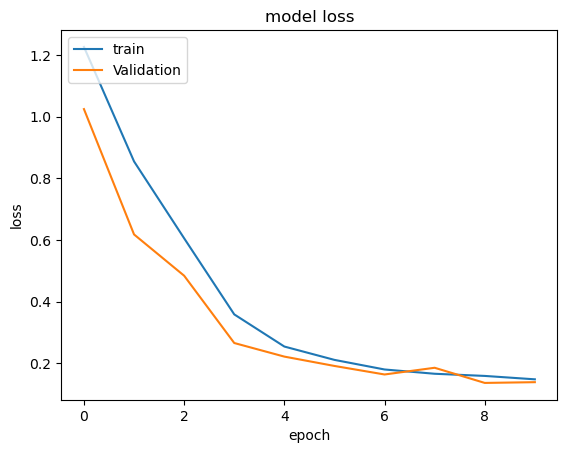

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

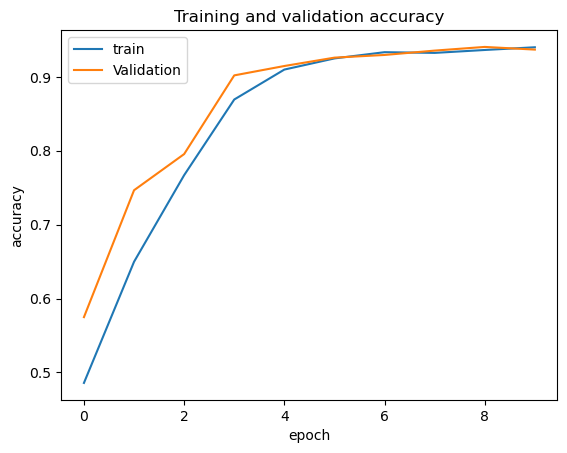

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
[[493   2   1   0   0   0]
 [ 39 415  17   0   0   0]
 [ 22   8 390   0   0   0]
 [  2   4   0 330 155   0]
 [  4   2   0  39 487   0]
 [  0   0   0   0   0 537]]
0.8998982015609094
0.8983239102527114
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       496
           1       0.96      0.88      0.92       471
           2       0.96      0.93      0.94       420
           3       0.89      0.67      0.77       491
           4       0.76      0.92      0.83       532
           5       1.00      1.00      1.00       537

    accuracy                           0.90      2947
   macro avg       0.91      0.90      0.90      2947
weighted avg       0.91      0.90      0.90      2947



<Axes: >

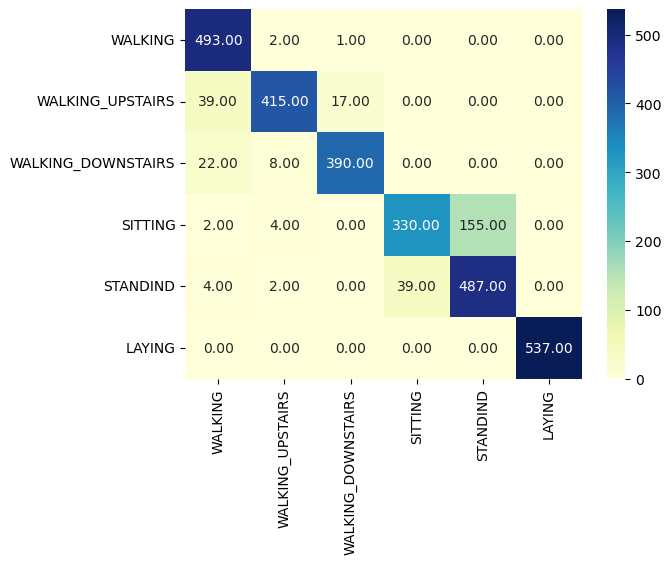

In [17]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

predy=model.predict(testX)
predy=np.argmax(predy, axis=-1)
LABELS = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS', 'SITTING','STANDIND','LAYING']
cm=confusion_matrix(testy,predy)
print(cm)
print(accuracy_score(testy,predy))
print(f1_score(testy,predy, average='weighted'))
print(classification_report(testy,predy))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [ ]:
#GRU 2

In [18]:
# Model 1
model = Sequential()
model.add(Bidirectional(GRU(128, return_sequences=True, input_shape=(n_timesteps, n_features))))
model.add(Dropout(0.5))

model.add(Bidirectional(GRU(128)))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))

model.add(Dense(n_outputs, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Build and initialize the model before calling summary
model.build(input_shape=(None, n_timesteps,n_features))

# Display model summary
model.summary()

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_1 (Bidirectional) │ (None, 128, 256)       │       106,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 256)            │       296,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 436,870 (1.67 MB)

 Trainable params: 436,870 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# validation_split = 0.1
batch_size = 128

train_epochs = 10
history = model.fit(trainX, trainy_one_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_one_hot), shuffle=True)

 

Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 30s 456ms/step - accuracy: 0.4619 - loss: 1.3265 - val_accuracy: 0.6564 - val_loss: 0.8562
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 482ms/step - accuracy: 0.6925 - loss: 0.7349 - val_accuracy: 0.8200 - val_loss: 0.4833
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 29s 498ms/step - accuracy: 0.8464 - loss: 0.3972 - val_accuracy: 0.9130 - val_loss: 0.2040
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 32s 551ms/step - accuracy: 0.9218 - loss: 0.2091 - val_accuracy: 0.9365 - val_loss: 0.1403
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 31s 533ms/step - accuracy: 0.9420 - loss: 0.1488 - val_accuracy: 0.9433 - val_loss: 0.1500
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 30s 511ms/step - accuracy: 0.9445 - loss: 0.1399 - val_accuracy: 0.9515 - val_loss: 0.1195
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 29s 507ms/step - accuracy: 0.9473 - loss: 0.1318 - val_accuracy: 0.9551 - val_loss: 0.1182
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 29s 497ms/step - accuracy: 0.9484 - loss: 0.1264 - val_accu

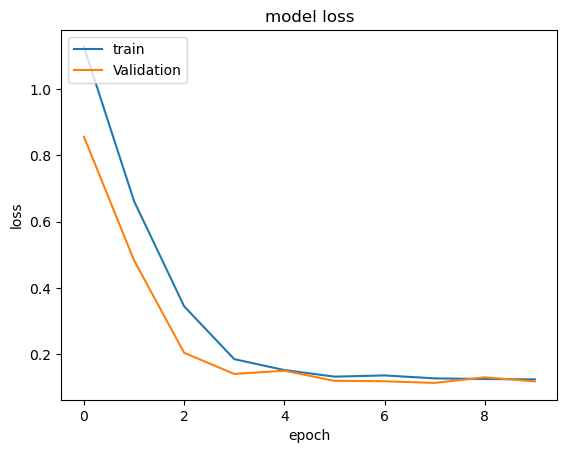

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

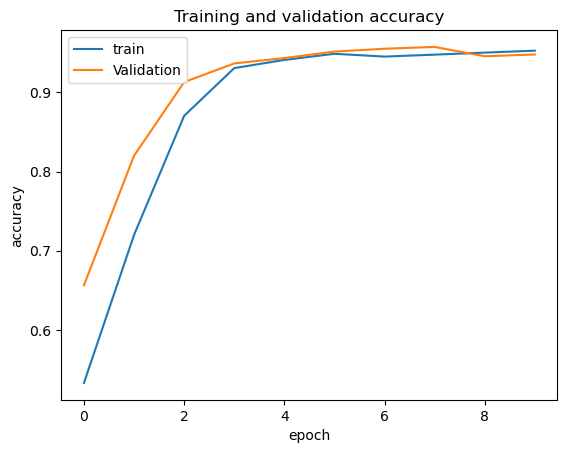

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step
[[458  22  16   0   0   0]
 [ 44 414  13   0   0   0]
 [  0   3 417   0   0   0]
 [  3  24   0 371  93   0]
 [ 14   0   0  54 464   0]
 [  0  23   0   0   0 514]]
0.8951476077366813
0.8944488693103205
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       496
           1       0.85      0.88      0.87       471
           2       0.93      0.99      0.96       420
           3       0.87      0.76      0.81       491
           4       0.83      0.87      0.85       532
           5       1.00      0.96      0.98       537

    accuracy                           0.90      2947
   macro avg       0.90      0.90      0.90      2947
weighted avg       0.90      0.90      0.89      2947



<Axes: >

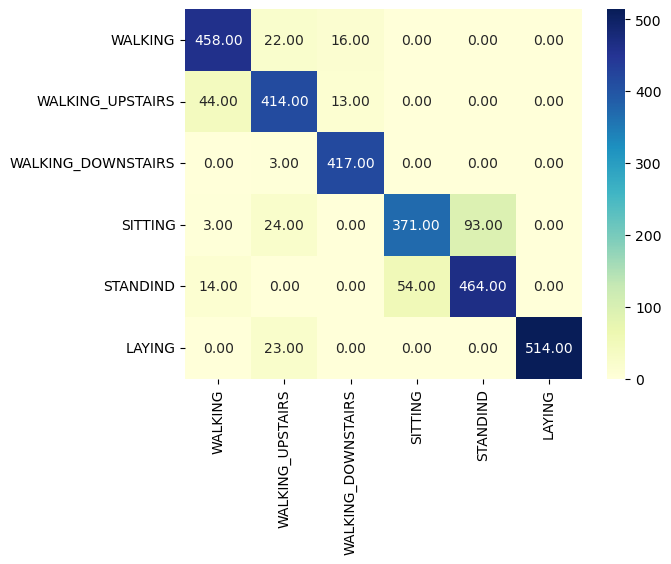

In [22]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

predy=model.predict(testX)
predy=np.argmax(predy, axis=-1)
LABELS = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS', 'SITTING','STANDIND','LAYING']
cm=confusion_matrix(testy,predy)
print(cm)
print(accuracy_score(testy,predy))
print(f1_score(testy,predy, average='weighted'))
print(classification_report(testy,predy))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [ ]:
#GRU 3

In [23]:
# Model 1
model = Sequential()
model.add(Bidirectional(GRU(128, return_sequences=True, input_shape=(n_timesteps, n_features))))
model.add(Dropout(0.5))

model.add(Bidirectional(GRU(128, return_sequences=True)))
model.add(Dropout(0.5))

model.add(Bidirectional(GRU(128)))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))

model.add(Dense(n_outputs, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Build and initialize the model before calling summary
model.build(input_shape=(None, n_timesteps,n_features))

# Display model summary
model.summary()

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_3 (Bidirectional) │ (None, 128, 256)       │       106,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 128, 256)       │       296,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 256)            │       296,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 733,318 (2.80 MB)

 Trainable params: 733,318 (2.80 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# validation_split = 0.1
batch_size = 128

train_epochs = 10
history = model.fit(trainX, trainy_one_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_one_hot), shuffle=True)

 

Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.4595 - loss: 1.2988 - val_accuracy: 0.6292 - val_loss: 0.9120
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 55s 956ms/step - accuracy: 0.6516 - loss: 0.8033 - val_accuracy: 0.8164 - val_loss: 0.4905
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 54s 939ms/step - accuracy: 0.8220 - loss: 0.4433 - val_accuracy: 0.8980 - val_loss: 0.2497
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 53s 908ms/step - accuracy: 0.9088 - loss: 0.2355 - val_accuracy: 0.9189 - val_loss: 0.1799
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 55s 955ms/step - accuracy: 0.9384 - loss: 0.1557 - val_accuracy: 0.9492 - val_loss: 0.1256
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 58s 999ms/step - accuracy: 0.9391 - loss: 0.1516 - val_accuracy: 0.9270 - val_loss: 0.1629
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.9436 - loss: 0.1385 - val_accuracy: 0.9393 - val_loss: 0.1186
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.9524 - loss: 0.1151 - val_accuracy: 0.9

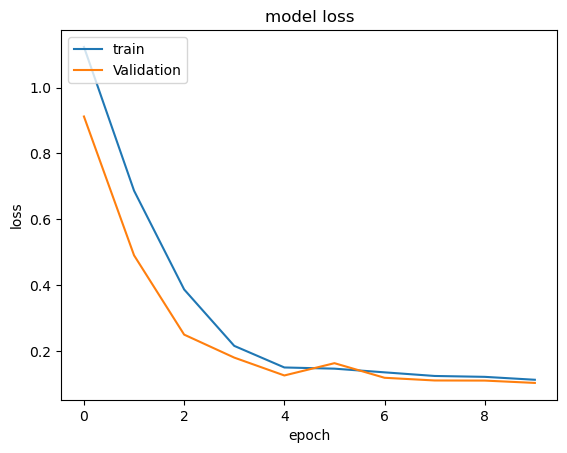

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
     

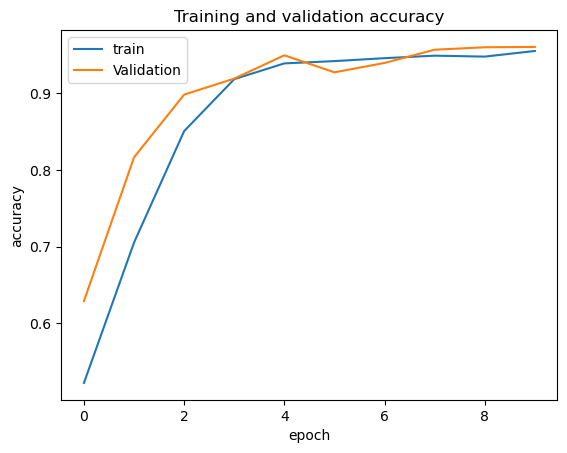

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step
[[473   2  21   0   0   0]
 [  5 432  34   0   0   0]
 [  0   2 418   0   0   0]
 [  0   8   0 410  72   1]
 [  2   0   0  98 432   0]
 [  0   0   0   0   0 537]]
0.9168646080760094
0.9168280598985212
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       496
           1       0.97      0.92      0.94       471
           2       0.88      1.00      0.94       420
           3       0.81      0.84      0.82       491
           4       0.86      0.81      0.83       532
           5       1.00      1.00      1.00       537

    accuracy                           0.92      2947
   macro avg       0.92      0.92      0.92      2947
weighted avg       0.92      0.92      0.92      2947



<Axes: >

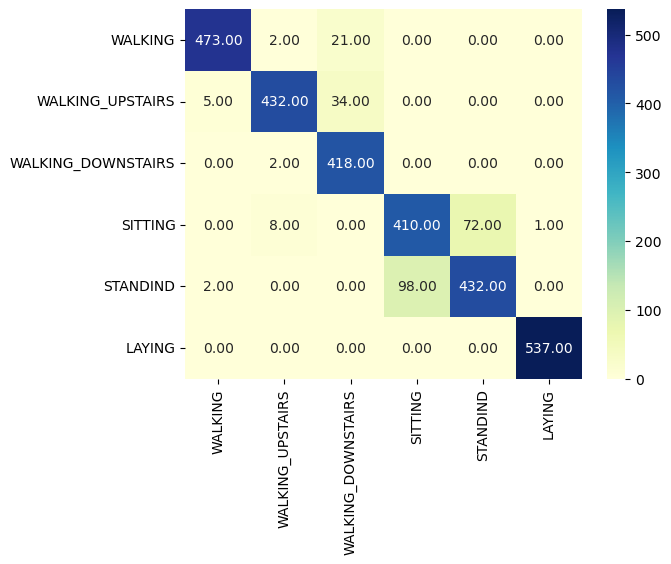

In [27]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

predy=model.predict(testX)
predy=np.argmax(predy, axis=-1)
LABELS = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS', 'SITTING','STANDIND','LAYING']
cm=confusion_matrix(testy,predy)
print(cm)
print(accuracy_score(testy,predy))
print(f1_score(testy,predy, average='weighted'))
print(classification_report(testy,predy))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [ ]:
#GRU 4

In [28]:
# Model 1
model = Sequential()
model.add(Bidirectional(GRU(128, return_sequences=True, input_shape=(n_timesteps, n_features))))
model.add(Dropout(0.5))

model.add(Bidirectional(GRU(128, return_sequences=True)))
model.add(Dropout(0.5))

model.add(Bidirectional(GRU(128, return_sequences=True)))
model.add(Dropout(0.5))

model.add(Bidirectional(GRU(128)))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))

model.add(Dense(n_outputs, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Build and initialize the model before calling summary
model.build(input_shape=(None, n_timesteps,n_features))

# Display model summary
model.summary()

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_6 (Bidirectional) │ (None, 128, 256)       │       106,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ (None, 128, 256)       │       296,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_8 (Bidirectional) │ (None, 128, 256)       │       296,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_9 (Bidirectional) │ (None, 256)            │       296,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,029,766 (3.93 MB)

 Trainable params: 1,029,766 (3.93 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# validation_split = 0.1
batch_size = 128

train_epochs = 10
history = model.fit(trainX, trainy_one_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_one_hot), shuffle=True)

 

Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 163s 3s/step - accuracy: 0.4630 - loss: 1.2941 - val_accuracy: 0.6632 - val_loss: 0.7161
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.6893 - loss: 0.6884 - val_accuracy: 0.8164 - val_loss: 0.4283
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.8510 - loss: 0.3777 - val_accuracy: 0.9125 - val_loss: 0.2122
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.9256 - loss: 0.1920 - val_accuracy: 0.9456 - val_loss: 0.1258
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.9344 - loss: 0.1565 - val_accuracy: 0.9574 - val_loss: 0.1197
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 148s 3s/step - accuracy: 0.9392 - loss: 0.1393 - val_accuracy: 0.9374 - val_loss: 0.1312
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 148s 3s/step - accuracy: 0.9466 - loss: 0.1294 - val_accuracy: 0.9420 - val_loss: 0.1204
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 150s 3s/step - accuracy: 0.9499 - loss: 0.1216 - val_accuracy: 0.9470 - v

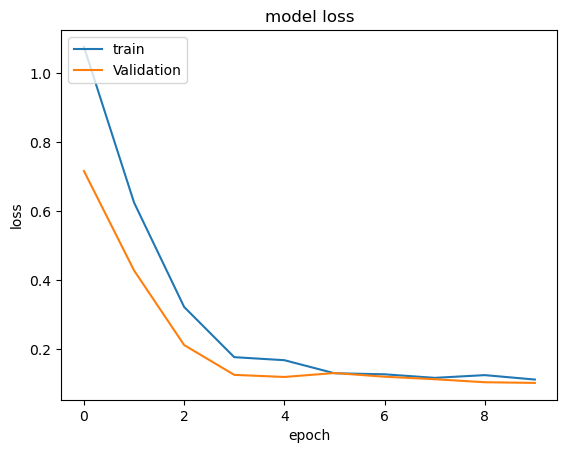

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

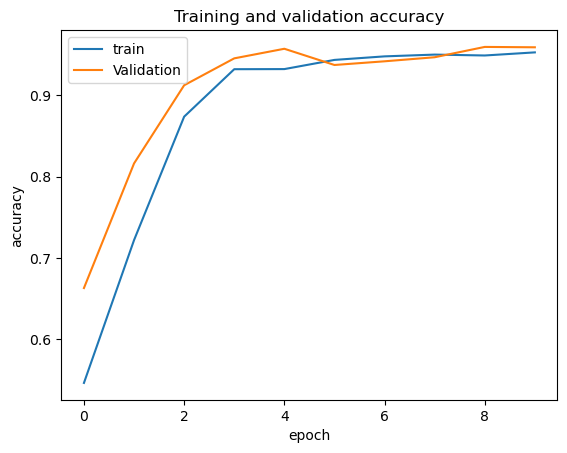

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

93/93 ━━━━━━━━━━━━━━━━━━━━ 11s 115ms/step
[[465   1  25   1   4   0]
 [ 24 431  16   0   0   0]
 [  0   8 412   0   0   0]
 [  0  21   0 383  82   5]
 [  0   0   0  64 468   0]
 [  0   0   0   0   0 537]]
0.9148286392941974
0.9141245136893608
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       496
           1       0.93      0.92      0.92       471
           2       0.91      0.98      0.94       420
           3       0.85      0.78      0.82       491
           4       0.84      0.88      0.86       532
           5       0.99      1.00      1.00       537

    accuracy                           0.91      2947
   macro avg       0.91      0.92      0.91      2947
weighted avg       0.91      0.91      0.91      2947



<Axes: >

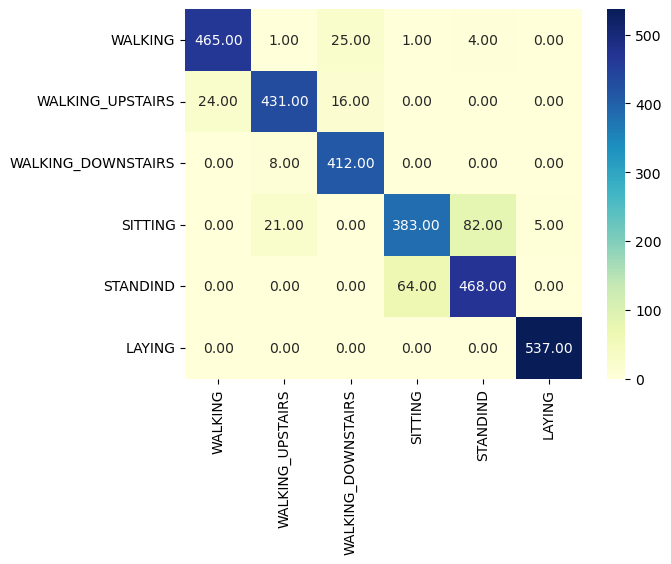

In [32]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

predy=model.predict(testX)
predy=np.argmax(predy, axis=-1)
LABELS = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS', 'SITTING','STANDIND','LAYING']
cm=confusion_matrix(testy,predy)
print(cm)
print(accuracy_score(testy,predy))
print(f1_score(testy,predy, average='weighted'))
print(classification_report(testy,predy))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [ ]:
#GRU5

In [33]:
# Model 1
model = Sequential()
model.add(Bidirectional(GRU(128, return_sequences=True, input_shape=(n_timesteps, n_features))))
model.add(Dropout(0.5))

model.add(Bidirectional(GRU(128, return_sequences=True)))
model.add(Dropout(0.5))

model.add(Bidirectional(GRU(128, return_sequences=True)))
model.add(Dropout(0.5))

model.add(Bidirectional(GRU(128, return_sequences=True)))
model.add(Dropout(0.5))

model.add(Bidirectional(GRU(128)))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))

model.add(Dense(n_outputs, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Build and initialize the model before calling summary
model.build(input_shape=(None, n_timesteps,n_features))

# Display model summary
model.summary()

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_10                │ (None, 128, 256)       │       106,752 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_11                │ (None, 128, 256)       │       296,448 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_12                │ (None, 128, 256)       │       296,448 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_13                │ (None, 128, 256)       │       296,448 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_14                │ (None, 256)            │       296,448 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,326,214 (5.06 MB)

 Trainable params: 1,326,214 (5.06 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# validation_split = 0.1
batch_size = 128

train_epochs = 10
history = model.fit(trainX, trainy_one_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_one_hot), shuffle=True)

 

Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 254s 4s/step - accuracy: 0.4230 - loss: 1.3328 - val_accuracy: 0.6922 - val_loss: 0.7249
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 243s 4s/step - accuracy: 0.7068 - loss: 0.6963 - val_accuracy: 0.8373 - val_loss: 0.4368
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 246s 4s/step - accuracy: 0.8568 - loss: 0.3791 - val_accuracy: 0.9329 - val_loss: 0.1960
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 252s 4s/step - accuracy: 0.9186 - loss: 0.2034 - val_accuracy: 0.9361 - val_loss: 0.1457
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 258s 4s/step - accuracy: 0.9392 - loss: 0.1494 - val_accuracy: 0.9533 - val_loss: 0.1276
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 258s 4s/step - accuracy: 0.9421 - loss: 0.1418 - val_accuracy: 0.9519 - val_loss: 0.1232
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 257s 4s/step - accuracy: 0.9433 - loss: 0.1396 - val_accuracy: 0.9533 - val_loss: 0.1119
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 259s 4s/step - accuracy: 0.9487 - loss: 0.1337 - val_accuracy: 0.9447 - v

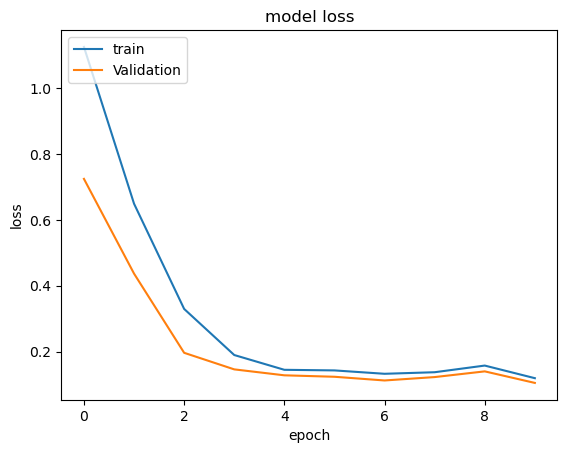

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

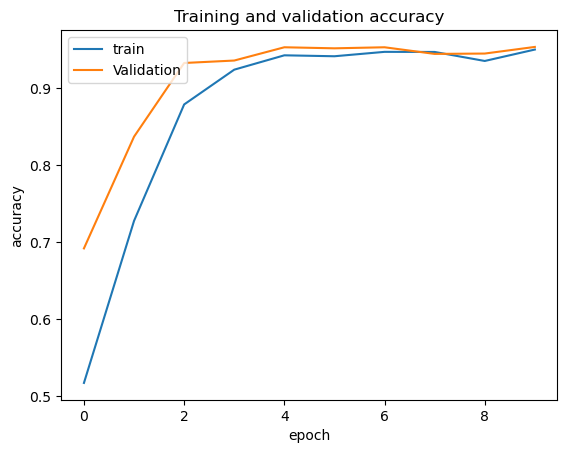

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

93/93 ━━━━━━━━━━━━━━━━━━━━ 21s 215ms/step
[[468   5  22   0   1   0]
 [  4 449  17   0   1   0]
 [  0   3 417   0   0   0]
 [  0  24   0 370  97   0]
 [  0  21   0  58 453   0]
 [  0   0   0   0   0 537]]
0.9141499830335935
0.9131888941441336
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       496
           1       0.89      0.95      0.92       471
           2       0.91      0.99      0.95       420
           3       0.86      0.75      0.81       491
           4       0.82      0.85      0.84       532
           5       1.00      1.00      1.00       537

    accuracy                           0.91      2947
   macro avg       0.91      0.92      0.91      2947
weighted avg       0.91      0.91      0.91      2947



<Axes: >

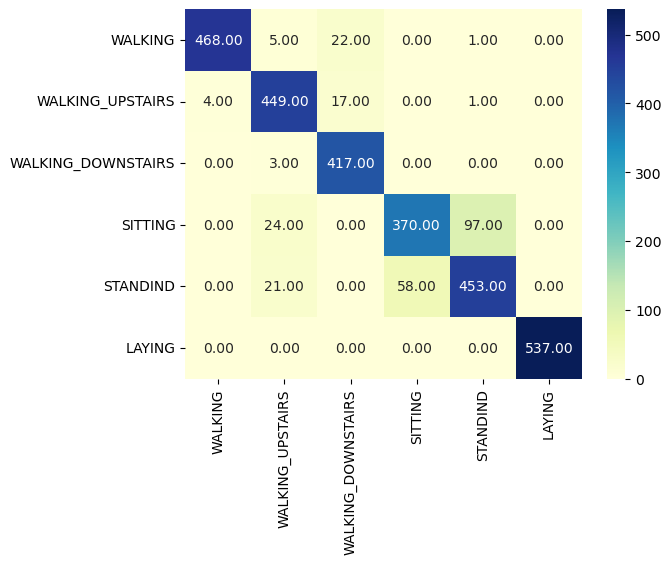

In [37]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

predy=model.predict(testX)
predy=np.argmax(predy, axis=-1)
LABELS = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS', 'SITTING','STANDIND','LAYING']
cm=confusion_matrix(testy,predy)
print(cm)
print(accuracy_score(testy,predy))
print(f1_score(testy,predy, average='weighted'))
print(classification_report(testy,predy))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')